In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cp /content/drive/"My Drive"/agaricus-lepiota.data agaricus-lepiota.data 

In [0]:
!ls

agaricus-lepiota.data  drive  sample_data


# Постановка задачи

Этот набор данных включает описания гипотетических образцов, соответствующих 23 видам жареных грибов семейства Agaricus и Lepiota. Каждый вид идентифицируется как съедобный и ядовитый.

Информация о данных:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

# Считывание данных

In [0]:
import pandas as pd 
import numpy as np
data = pd.read_csv("agaricus-lepiota.data", sep=',', header=None)
data.columns = ['edible', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachmen', 'gill-spacing', 
                'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
                'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']

In [0]:
data

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachmen,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


# Обработка данных

Пропущенные значения имеют вид "?", а не NaN как обычно 

In [0]:
for column in data.columns:
  print(column, data[column].unique())

edible ['p' 'e']
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises ['t' 'f']
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachmen ['f' 'a']
gill-spacing ['c' 'w']
gill-size ['n' 'b']
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape ['e' 't']
stalk-root ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type ['p']
veil-color ['w' 'n' 'o' 'y']
ring-number ['o' 't' 'n']
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [0]:
data = data.drop( columns=['veil-type'])

In [0]:
data = data.replace(to_replace = "?", value=np.nan) 

In [0]:
for column in data.columns:
  print(column, data[column].mode())
data = data.fillna(data.mode().iloc[0])
data

edible 0    e
dtype: object
cap-shape 0    x
dtype: object
cap-surface 0    y
dtype: object
cap-color 0    n
dtype: object
bruises 0    f
dtype: object
odor 0    n
dtype: object
gill-attachmen 0    f
dtype: object
gill-spacing 0    c
dtype: object
gill-size 0    b
dtype: object
gill-color 0    b
dtype: object
stalk-shape 0    t
dtype: object
stalk-root 0    b
dtype: object
stalk-surface-above-ring 0    s
dtype: object
stalk-surface-below-ring 0    s
dtype: object
stalk-color-above-ring 0    w
dtype: object
stalk-color-below-ring 0    w
dtype: object
veil-color 0    w
dtype: object
ring-number 0    o
dtype: object
ring-type 0    p
dtype: object
spore-print-color 0    w
dtype: object
population 0    v
dtype: object
habitat 0    d
dtype: object


,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachmen,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,b,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,b,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,b,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,b,s,k,w,w,w,o,e,w,v,l


Обработка категориальных признаков

In [0]:
data.at[data['edible'] == 'p', 'edible'] = 1
data.at[data['edible'] == 'e', 'edible'] = 0

data.at[data['bruises'] == 't', 'bruises'] = 1
data.at[data['bruises'] == 'f', 'bruises'] = 0

data.at[data['gill-attachmen'] == 'f', 'gill-attachmen'] = 1
data.at[data['gill-attachmen'] == 'a', 'gill-attachmen'] = 0

data.at[data['gill-spacing'] == 'c', 'gill-spacing'] = 1
data.at[data['gill-spacing'] == 'w', 'gill-spacing'] = 0

data.at[data['gill-size'] == 'n', 'gill-size'] = 1
data.at[data['gill-size'] == 'b', 'gill-size'] = 0

data.at[data['stalk-shape'] == 'e', 'stalk-shape'] = 1
data.at[data['stalk-shape'] == 't', 'stalk-shape'] = 0

# ring number 
data.at[data['ring-number'] == 'n', 'ring-number'] = 0 #none
data.at[data['ring-number'] == 'o', 'ring-number'] = 1 #one
data.at[data['ring-number'] == 't', 'ring-number'] = 2 #two

In [0]:
for column in data.columns:
  print(column, data[column].unique())

edible [1 0]
cap-shape ['x' 'b' 's' 'f' 'k' 'c']
cap-surface ['s' 'y' 'f' 'g']
cap-color ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises [1 0]
odor ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachmen [1 0]
gill-spacing [1 0]
gill-size [1 0]
gill-color ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape [1 0]
stalk-root ['e' 'c' 'b' 'r']
stalk-surface-above-ring ['s' 'f' 'k' 'y']
stalk-surface-below-ring ['s' 'f' 'y' 'k']
stalk-color-above-ring ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-color ['w' 'n' 'o' 'y']
ring-number [1 2 0]
ring-type ['p' 'e' 'l' 'f' 'n']
spore-print-color ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population ['s' 'n' 'a' 'v' 'y' 'c']
habitat ['u' 'g' 'm' 'd' 'p' 'w' 'l']


In [0]:
data.describe(include = 'all')

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachmen,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,4,4,4,9,9,4,3,5,9,6,7
top,0,x,y,n,0,n,1,1,0,b,0,b,s,s,w,w,w,1,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,6256,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


In [0]:
nonbinary_columns = [c for c in data.columns if len(data[c].unique()) > 2]
nonbinary_columns.remove('ring-number')

print(nonbinary_columns)

data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-type', 'spore-print-color', 'population', 'habitat']
Index(['cap-shape_b', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k',
       'cap-shape_s', 'cap-shape_x', 'cap-surface_f', 'cap-surface_g',
       'cap-surface_s', 'cap-surface_y',
       ...
       'population_s', 'population_v', 'population_y', 'habitat_d',
       'habitat_g', 'habitat_l', 'habitat_m', 'habitat_p', 'habitat_u',
       'habitat_w'],
      dtype='object', length=102)


In [0]:
column_without_nonbinary = [i for i in data.columns if i not in nonbinary_columns]
data = pd.concat((data_nonbinary, data[column_without_nonbinary]), axis = 1)

In [0]:
data.describe()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,...,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.055638,0.000492,0.387986,0.101920,0.003939,0.450025,0.285574,0.000492,0.314623,0.399311,0.020679,0.005416,0.184638,0.226489,0.281142,0.017725,0.001969,0.001969,0.128016,0.131955,0.049237,0.023634,0.265879,0.049237,0.004431,0.434269,0.031512,0.070901,0.070901,0.212703,0.011817,0.092565,0.090103,0.050222,0.129000,0.007878,0.183653,0.002954,0.060561,0.147957,...,0.053176,0.004431,0.011817,0.070901,0.063023,0.023634,0.230428,0.539636,0.002954,0.011817,0.011817,0.975382,0.000985,0.341704,0.005908,0.159527,0.004431,0.488429,0.005908,0.200886,0.230428,0.242245,0.005908,0.008863,0.005908,0.293944,0.005908,0.047267,0.041851,0.049237,0.153619,0.497292,0.210734,0.387494,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634
std,0.229235,0.022185,0.487321,0.302562,0.062641,0.497527,0.451715,0.022185,0.464394,0.489787,0.142318,0.073399,0.388028,0.418585,0.449584,0.131959,0.044338,0.044338,0.334128,0.338462,0.216375,0.151914,0.441827,0.216375,0.066425,0.495691,0.174706,0.256675,0.256675,0.409245,0.108068,0.289840,0.286347,0.218415,0.335221,0.088413,0.387225,0.054276,0.238539,0.355079,...,0.224398,0.066425,0.108068,0.256675,0.243020,0.151914,0.421133,0.498457,0.054276,0.108068,0.108068,0.154969,0.031367,0.474310,0.076644,0.366190,0.066425,0.499897,0.076644,0.400688,0.421133,0.428468,0.076644,0.093729,0.076644,0.455595,0.076644,0.212223,0.200262,0.216375,0.360605,0.500023,0.407855,0.487208,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [0]:
data.corr()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-color_b,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,...,stalk-color-below-ring_b,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
cap-shape_b,1.000000,-0.005387,-0.193260,-0.081769,-0.015264,-0.219564,-0.091638,0.018820,0.117712,-0.027947,0.010011,-0.017912,-0.115505,-0.069760,-0.084902,0.016231,-0.010782,-0.010782,0.212380,0.117981,0.262455,-0.037764,-0.146074,0.262455,-0.016194,-0.000314,-0.043783,-0.067052,-0.067052,-0.126163,-0.026543,0.122587,-0.076382,0.101547,0.034751,0.075558,-0.070747,0.105523,-0.061628,0.084884,...,-0.057522,-0.016194,-0.026543,-0.067052,-0.045272,0.131922,-0.132818,0.157391,0.046155,0.092724,0.092724,-0.134710,0.026622,-0.163553,-0.018713,-0.105748,-0.016194,0.237666,0.065370,-0.121699,0.030409,0.038235,0.065370,0.183315,-0.018713,-0.024592,0.065370,-0.054064,0.024358,0.381589,0.158702,-0.168381,-0.120154,-0.182037,0.149151,0.010113,0.374316,-0.095178,-0.052871,-0.037764
cap-shape_c,-0.005387,1.000000,-0.017672,-0.007477,-0.001396,-0.020077,-0.014032,0.249631,-0.015038,0.015893,-0.003225,-0.001638,-0.010562,-0.012010,-0.013880,-0.002981,-0.000986,-0.000986,0.024711,0.024136,-0.005051,-0.003453,-0.013357,-0.005051,-0.001481,0.025332,-0.004003,-0.006131,-0.006131,-0.011536,-0.002427,-0.007089,-0.006984,-0.005104,-0.008542,-0.001978,-0.010527,-0.001208,-0.005635,0.037634,...,-0.005260,-0.001481,-0.002427,-0.006131,-0.005756,-0.003453,-0.012145,-0.001765,0.203269,-0.002427,-0.002427,-0.068089,0.353118,0.007408,-0.001711,-0.009670,-0.001481,0.000514,-0.001711,-0.011128,-0.012145,-0.012549,-0.001711,-0.002099,-0.001711,0.034398,-0.001711,-0.004944,0.106197,-0.005051,-0.009456,-0.022075,-0.011469,-0.017653,-0.013306,0.065707,-0.004286,-0.008985,-0.004835,-0.003453
cap-shape_f,-0.193260,-0.017672,1.000000,-0.268226,-0.050070,-0.720235,0.064801,-0.006285,-0.093397,0.029076,0.019203,-0.003687,0.009128,0.056794,0.019014,-0.045696,0.010211,0.010211,-0.088841,-0.010390,-0.097130,-0.123876,0.083449,-0.097130,-0.007483,0.066856,0.041464,-0.030983,-0.030983,-0.058296,-0.012265,-0.048604,0.072336,-0.025790,0.007077,-0.025233,0.059448,0.012513,0.032947,-0.013773,...,0.054476,-0.007483,-0.012265,0.063501,0.042985,-0.044056,0.039405,-0.092710,-0.015414,-0.030966,-0.030966,0.044987,-0.008890,-0.014407,0.017722,0.100147,-0.007483,-0.061414,-0.021831,0.115253,0.015410,0.014411,-0.021831,0.021737,0.017722,-0.125597,-0.021831,0.051201,-0.035214,-0.181191,-0.075804,0.034625,0.111346,0.074986,-0.017982,-0.052326,-0.129312,0.021891,0.030636,-0.017450
cap-shape_k,-0.081769,-0.007477,-0.268226,1.000000,-0.021185,-0.304733,-0.158942,0.010863,0.137988,0.015261,-0.003209,0.041662,0.162657,-0.135632,0.125992,0.004081,-0.014965,-0.014965,-0.068190,-0.124132,-0.076662,-0.052412,-0.025921,-0.076662,0.051031,-0.098152,-0.060766,0.211298,0.211298,0.397574,0.083644,-0.062672,-0.106010,-0.077465,-0.110226,0.043614,-0.126160,-0.018337,-0.085533,-0.024646,...,-0.079835,0.051031,0.083644,-0.093061,-0.047186,0.076150,0.093916,-0.023524,0.026642,0.053523,0.053523,-0.077

# KNN

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

x = data.drop('edible', axis = 1) 
y = data['edible']

x = x.to_numpy()
y = np.array(y, dtype='int')

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 228)

In [0]:
print(y)

[1 0 0 ... 0 1 0]


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 500)
knn.fit(x_train, y_train)

y_test_predict = knn.predict(x_test)

print(confusion_matrix(y_test, y_test_predict))
print(accuracy_score(y_test, y_test_predict))

[[824  12]
 [ 64 725]]
0.9532307692307692


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(x_train, y_train)

y_test_predict = knn.predict(x_test)

print(confusion_matrix(y_test, y_test_predict))
print(accuracy_score(y_test, y_test_predict))

[[836   0]
 [  2 787]]
0.9987692307692307


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)

y_test_predict = knn.predict(x_test)

print(confusion_matrix(y_test, y_test_predict))
print(accuracy_score(y_test, y_test_predict))

[[836   0]
 [  0 789]]
1.0


In [0]:
def train_and_valuate(model, x, y):
  kf = KFold(n_splits=5)
  accuracy = cross_val_score(model, principal_df, y, cv=kf)
  print("Accuracy: {}".format(accuracy))
  print("Mean accuracy: {}".format(sum(accuracy)/len(accuracy)))

In [0]:
knn1 = KNeighborsClassifier(n_neighbors = 5)
train_and_valuate(knn1, x, y)
knn2 = KNeighborsClassifier(n_neighbors = 50)
train_and_valuate(knn2, x, y)
knn3 = KNeighborsClassifier(n_neighbors = 500)
train_and_valuate(knn3, x, y)

Accuracy: [0.91692308 0.89969231 0.89353846 0.832      0.88731527]
Mean accuracy: 0.8858938234179613
Accuracy: [0.90276923 0.93723077 0.90030769 0.78276923 0.90332512]
Mean accuracy: 0.8852804092459264
Accuracy: [0.88123077 0.93230769 0.88553846 0.77353846 0.93472906]
Mean accuracy: 0.8814688897309587


# Lab 2

Применение PCA

In [0]:
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principal_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

Визуализируем полученные данные

      principal component 1  principal component 2
0                 -1.489694               0.294915
1                 -1.486889              -0.451304
2                 -1.646075              -0.207696
3                 -1.512454              -0.054453
4                 -1.223310               0.360846
...                     ...                    ...
8119              -0.515014               0.178105
8120              -0.425452               0.194168
8121              -0.626133               0.014046
8122               0.962599               1.927495
8123              -0.596165               0.006935

[8124 rows x 2 columns]


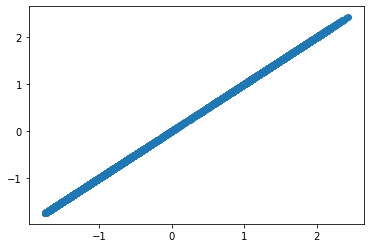

In [0]:
from matplotlib.pyplot import (axes,axis,title,legend,figure,
                               xlabel,ylabel,xticks,yticks,
                               xscale,yscale,text,grid,
                               plot,scatter,errorbar,hist,polar,
                               contour,contourf,colorbar,clabel,
                               imshow)
print(principal_df)
scatter(principal_df["principal component 1"], principal_df["principal component 1"])

Попробуем работу моделей с разным количеством компонент

In [0]:
def pca_train_and_valuate(model, number_compenent, x, y):
  pca = PCA(n_components=number_compenent)
  principalComponents = pca.fit_transform(x)
  col = ['principal component {}'.format(i) for i in range(1, number_compenent + 1)]
  principal_df = pd.DataFrame(data = principalComponents, columns = col)
  
  kf = KFold(n_splits=5)

  test_accuracy = cross_val_score(model, principal_df, y, scoring='accuracy',cv=kf)
  print("Accuracy: {}".format(test_accuracy))
  print("Mean accuracy: {}".format(sum(test_accuracy)/len(test_accuracy)))
  return sum(test_accuracy)/len(test_accuracy)


In [0]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 5)
acc_val = []

In [0]:
acc_val.append(pca_train_and_valuate(knn, 2, x, y))

Accuracy: [0.91692308 0.89969231 0.89353846 0.832      0.88731527]
Mean accuracy: 0.8858938234179613


In [0]:
acc_val.append(pca_train_and_valuate(knn, 3, x, y))

Accuracy: [0.90646154 0.99446154 0.96492308 0.92861538 0.87068966]
Mean accuracy: 0.9330302387267905


In [0]:
acc_val.append(pca_train_and_valuate(knn, 4, x, y))

Accuracy: [0.94953846 0.99876923 0.984      0.94707692 0.88916256]
Mean accuracy: 0.953709435392194


In [0]:
acc_val.append(pca_train_and_valuate(knn, 5, x, y))

Accuracy: [0.93907692 1.         1.         0.96       0.92610837]
Mean accuracy: 0.9650370594922318


In [0]:
acc_val.append(pca_train_and_valuate(knn, 6, x, y))

Accuracy: [0.90830769 1.         1.         0.95753846 0.95504926]
Mean accuracy: 0.9641790829859795


Лучшее значение - 5 главных компонент

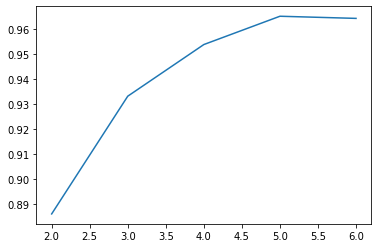

In [0]:
plot([2, 3, 4, 5, 6], acc_val)
pass

Пробуем SVM

In [0]:
from sklearn import svm

clf = svm.SVC(gamma='scale')
train_and_valuate(clf, x, y)
pca_train_and_valuate(clf, 4, x, y)

Accuracy: [0.88123077 0.93230769 0.88738462 0.77784615 0.92918719]
Mean accuracy: 0.8815912845774916
Accuracy: [0.86646154 0.992      0.95753846 0.89723077 0.83128079]
Mean accuracy: 0.9089023114816218


0.9089023114816218

Вывод: Метод PCA действительно позволяет значительно улучшить качество предсказания. Точность повысилась с 0.88 до 0.96 у метода ближайшего соседа, с 0.88 до 0.90 у SVM для данной задачи.

# Lab 3 MPL

Обучим MLP Classifier.

In [0]:
from sklearn.neural_network import MLPClassifier


mlp_model = MLPClassifier(solver = 'lbfgs', activation = 'logistic', random_state = 21)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 8)
mlp_model.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=21, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [0]:
y_test_pred = mlp_model.predict(x_test)
y_train_pred = mlp_model.predict(x_train)

In [0]:
print("Train confusion matrix:")
print(confusion_matrix(y_train_pred, y_train))
print("Train error score = {}\n\n".format(1 - accuracy_score(y_train_pred, y_train)))
print("Test confusion matrix:")
print(confusion_matrix(y_test_pred, y_test))
print("Test error score = {}".format(1 - accuracy_score(y_test_pred, y_test)))

Train confusion matrix:
[[2915    0]
 [   0 2771]]
Train error score = 0.0


Test confusion matrix:
[[1293    0]
 [   0 1145]]
Test error score = 0.0


Как мы видим, такой классификатор показал лучший результат с нулевой ошибкой. Проверим, как зависит результат от количества скрытых слоев и параметра alpha (может быть в первый раз параметры оказались удачными случайно)

Подберем оптимальное значение параметра регуляризации alpha.

In [0]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(x_train, y_train)

    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

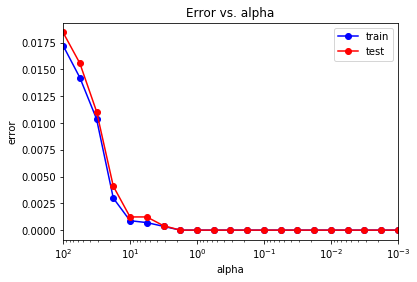

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [0]:
for i in range(0, len(alpha_arr)):
  print("Error train %.6f test %.6f |  alpha %.5f" % (train_err[i], test_err[i], alpha_arr[i]))

Error train 0.000000 test 0.000000 |  alpha 0.00100
Error train 0.000000 test 0.000000 |  alpha 0.00178
Error train 0.000000 test 0.000000 |  alpha 0.00316
Error train 0.000000 test 0.000000 |  alpha 0.00562
Error train 0.000000 test 0.000000 |  alpha 0.01000
Error train 0.000000 test 0.000000 |  alpha 0.01778
Error train 0.000000 test 0.000000 |  alpha 0.03162
Error train 0.000000 test 0.000000 |  alpha 0.05623
Error train 0.000000 test 0.000000 |  alpha 0.10000
Error train 0.000000 test 0.000000 |  alpha 0.17783
Error train 0.000000 test 0.000000 |  alpha 0.31623
Error train 0.000000 test 0.000000 |  alpha 0.56234
Error train 0.000000 test 0.000000 |  alpha 1.00000
Error train 0.000000 test 0.000000 |  alpha 1.77828
Error train 0.000352 test 0.000410 |  alpha 3.16228
Error train 0.000703 test 0.001231 |  alpha 5.62341
Error train 0.000879 test 0.001231 |  alpha 10.00000
Error train 0.002990 test 0.004102 |  alpha 17.78279
Error train 0.010376 test 0.011075 |  alpha 31.62278
Error tra

Из графика заметно, что ошибка на выборках исчезает при значениях alpha прмерно меньше 2. Переобучения не наблюдается, так как ошибка на тестовой выборке не увеличивается.

Подберем оптимальное значение количества скрытых слоев.

In [0]:
train_err_hidden = []
test_err_hidden = []

for i in range(1, 100):
    mlp_model = MLPClassifier(hidden_layer_sizes = (i,), solver = 'lbfgs', activation = 'logistic', random_state = 19)
    mlp_model.fit(x_train, y_train)
    y_train_pred = mlp_model.predict(x_train)
    y_test_pred = mlp_model.predict(x_test)
    train_err_hidden.append(np.mean(y_train != y_train_pred))
    test_err_hidden.append(np.mean(y_test != y_test_pred))

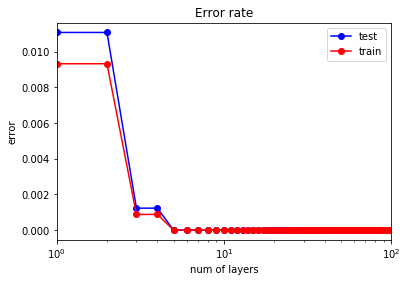

In [0]:
plt.semilogx(range(1, 100), test_err_hidden, 'b-o', label = 'test')
plt.semilogx(range(1, 100), train_err_hidden, 'r-o', label = 'train')
plt.xlim([1, 100])
plt.title('Error rate')
plt.xlabel('num of layers')
plt.ylabel('error')
plt.legend()
pass

In [0]:
for i in range(1, 100):
  if train_err_hidden[i] == 0 and test_err_hidden[i] == 0:
    print("Hidden layers %i:" % i)
    break

Hidden layers 4:


Начиная с 4 слоев, ошибка становиться нулевой, и это является оптимальным значением. 

# Lab 4 MLP & PCA

Используем MLP, но применяя метод PCA

In [0]:
from sklearn.decomposition import PCA

x = data.drop('edible', axis = 1) 
y = data['edible']

x = x.to_numpy()
y = np.array(y, dtype='int')

pca = PCA(n_components=10)
pca.fit(x)
x_pca_train = pca.transform(x_train)
x_pca_test = pca.transform(x_test)
mlp_model = MLPClassifier(alpha = alpha, solver = 'lbfgs', activation = 'logistic', random_state = 19)
mlp_model.fit(x_pca_train, y_train)
y_train_pred = mlp_model.predict(x_pca_train)
y_test_pred = mlp_model.predict(x_pca_test)

print("Train confusion matrix:")
print(confusion_matrix(y_train_pred, y_train))
print("Train error score = {}\n\n".format(1 - accuracy_score(y_train_pred, y_train)))
print("Test confusion matrix:")
print(confusion_matrix(y_test_pred, y_test))
print("Test error score = {}".format(1 - accuracy_score(y_test_pred, y_test)))

Train confusion matrix:
[[2915    0]
 [   0 2771]]
Train error score = 0.0


Test confusion matrix:
[[1291    6]
 [   2 1139]]
Test error score = 0.003281378178835115


Видим, что результаты ухудшились по сравнению с использованием MLP без применения PCA. 

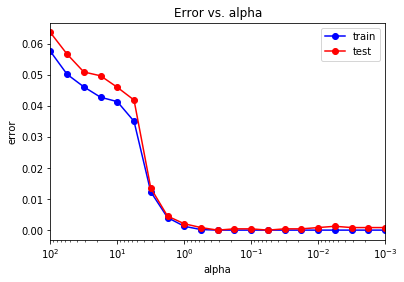

In [0]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(x_pca_train, y_train)

    y_pca_train_pred = mlp_model.predict(x_pca_train)
    y_pca_test_pred = mlp_model.predict(x_pca_test)
    train_err.append(np.mean(y_train != y_pca_train_pred))
    test_err.append(np.mean(y_test != y_pca_test_pred))


plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

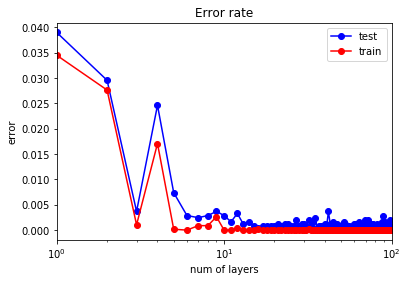

In [0]:
train_err_hidden = []
test_err_hidden = []

for i in range(1, 100):
    mlp_model = MLPClassifier(hidden_layer_sizes = (i,), solver = 'lbfgs', activation = 'logistic', random_state = 19)
    mlp_model.fit(x_pca_train, y_train)
    y_pca_train_pred = mlp_model.predict(x_pca_train)
    y_pca_test_pred = mlp_model.predict(x_pca_test)
    train_err_hidden.append(np.mean(y_train != y_pca_train_pred))
    test_err_hidden.append(np.mean(y_test != y_pca_test_pred))
plt.semilogx(range(1, 100), test_err_hidden, 'b-o', label = 'test')
plt.semilogx(range(1, 100), train_err_hidden, 'r-o', label = 'train')
plt.xlim([1, 100])
plt.title('Error rate')
plt.xlabel('num of layers')
plt.ylabel('error')
plt.legend()
pass

Как мы видим использование PCA не улучшает ситуацию, а наоборот - ошибка возрастает по сравнению с результатами без PCA. При подборе параметров ошибка на обучающей выборке исчезает, однако на тестовой просто уменьшается, но присутствует, чего мы не наблюдаем на примере без PCA.

# Lab 5 Random Forest and  Gradient Boosting tree 

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 8)

In [0]:
trees_number = [1, 2, 3, 4, 5, 10, 15, 20, 25, 100, 200]
for num in trees_number:
  rf_model = RandomForestClassifier(n_estimators = num, oob_score= True) 
  rf_model.fit(x_train, y_train)
  y_test_pred = rf_model.predict(x_test)
  y_train_pred = rf_model.predict(x_train)
  train_score = 1 - accuracy_score(y_train_pred, y_train)
  test_score = 1 - accuracy_score(y_test_pred, y_test)
  oob_error = 1 - rf_model.oob_score_
  print("Trees num: {}, train error: {}, test error: {}, oob error {}".format(num, train_score, test_score, oob_error))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

Trees num: 1, train error: 0.0, test error: 0.0, oob error 0.30460780865283155
Trees num: 2, train error: 0.00017587055926837625, test error: 0.0012305168170632097, oob error 0.19838199085473096
Trees num: 3, train error: 0.0, test error: 0.0, oob error 0.12469222652128031
Trees num: 4, train error: 0.0, test error: 0.0, oob error 0.08002110446711219


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Trees num: 5, train error: 0.0, test error: 0.0, oob error 0.05276116778051354
Trees num: 10, train error: 0.0, test error: 0.0, oob error 0.0052761167780513984


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Trees num: 15, train error: 0.0, test error: 0.0, oob error 0.0005276116778051287
Trees num: 20, train error: 0.0, test error: 0.0, oob error 0.0
Trees num: 25, train error: 0.0, test error: 0.0, oob error 0.0
Trees num: 100, train error: 0.0, test error: 0.0, oob error 0.0
Trees num: 200, train error: 0.0, test error: 0.0, oob error 0.0


Random forest дает идеальные результаты(нулевая ошибка на тестовой и обучающей выборке, нулевую oob ошибку) уже при 20 решающих деревьев. 

In [0]:
y_test_pred = rf_model.predict(x_test)
y_train_pred = rf_model.predict(x_train)

print("Train confusion matrix:")
print(confusion_matrix(y_train_pred, y_train))
print("Train error score = {}\n\n".format(1 - accuracy_score(y_train_pred, y_train)))
print("Test confusion matrix:")
print(confusion_matrix(y_test_pred, y_test))
print("Test error score = {}".format(1 - accuracy_score(y_test_pred, y_test)))

Train confusion matrix:
[[2915    0]
 [   0 2771]]
Train error score = 0.0


Test confusion matrix:
[[1293    0]
 [   0 1145]]
Test error score = 0.0


Gradient boosting tree

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
trees_number = [1, 2, 3, 4, 5, 10, 15, 20, 25, 35, 50, 75, 100, 200]
for num in trees_number:
  rb_model = GradientBoostingClassifier(n_estimators = num) 
  rb_model.fit(x_train, y_train)
  y_test_pred = rb_model.predict(x_test)
  y_train_pred = rb_model.predict(x_train)
  train_score = 1 - accuracy_score(y_train_pred, y_train)
  test_score = 1 - accuracy_score(y_test_pred, y_test)
  print("Trees num: {}, train error: {}, test error: {}".format(num, train_score, test_score))

Trees num: 1, train error: 0.014309893829819953, test error: 0.016615384615384587
Trees num: 2, train error: 0.014309893829819953, test error: 0.016615384615384587
Trees num: 3, train error: 0.014309893829819953, test error: 0.016615384615384587
Trees num: 4, train error: 0.014309893829819953, test error: 0.016615384615384587
Trees num: 5, train error: 0.014309893829819953, test error: 0.016615384615384587
Trees num: 10, train error: 0.00276965687028774, test error: 0.0036923076923076614
Trees num: 15, train error: 0.002308047391906487, test error: 0.0006153846153845732
Trees num: 20, train error: 0.0010770887828897013, test error: 0.0006153846153845732
Trees num: 25, train error: 0.000923218956762617, test error: 0.0006153846153845732
Trees num: 35, train error: 0.0006154793045083373, test error: 0.0
Trees num: 50, train error: 0.000461609478381253, test error: 0.0
Trees num: 75, train error: 0.0, test error: 0.0
Trees num: 100, train error: 0.0, test error: 0.0
Trees num: 200, train 

Оба классификатора хорошо себя показали, и при достаточном количесвте решающих деревьев предсказывают без ошибок. Переобучение не наблюдается.

В ходе выполнения работы выяснилось, что датасет оказался простым и легко поддающимся для предсказания(KNN, MLP Classifier, Random Forest, Gradient Boosting Classifier можно настроить и обучить до нулевой ошибки). Переобучения не наблюдалось при обучении всех классификаторо.

## Lab 7 Clustering

In [0]:
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation, AgglomerativeClustering, MiniBatchKMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score
from seaborn import heatmap

KMeans

Accuracy 0.8951255539143279


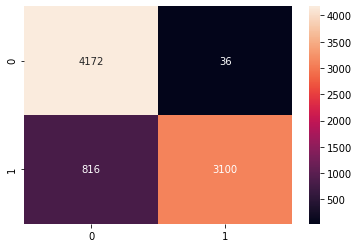

In [0]:
km_model = KMeans(n_clusters=2)
km_model.fit(x)
print("Accuracy {}".format(accuracy_score(km_model.labels_, y)))
heatmap(confusion_matrix(y, km_model.labels_), annot=True, fmt="d")
pass

Accuracy 0.8951255539143279


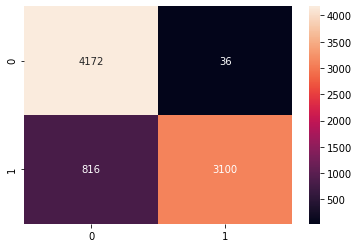

In [0]:
km_model = KMeans(n_clusters=2, n_init=200, tol=0.001, init="k-means++")
km_model.fit(x)
print("Accuracy {}".format(accuracy_score(km_model.labels_, y)))
heatmap(confusion_matrix(y, km_model.labels_), annot=True, fmt="d")
pass

DBSCAN

Accuracy 0.6479566715903495
[0 0 0 ... 3 0 3]
{0, 1, 2, 3, 4, 5}


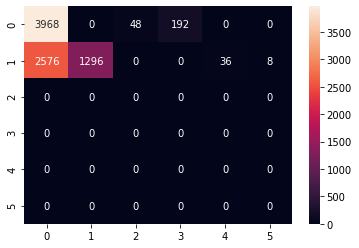

In [0]:
model = DBSCAN(eps=3, min_samples=6)
model.fit(x)
print("Accuracy {}".format(sum(model.labels_ == y)/len(y)))
heatmap(confusion_matrix(y, model.labels_), annot=True, fmt="d")
print(model.labels_)
print(set(model.labels_))
pass

AffinityPropagation

/usr/local/lib/python3.6/dist-packages/sklearn/cluster/_affinity_propagation.py:226: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  "will not have any cluster centers.", ConvergenceWarning)


Accuracy 0.0
[-1 -1 -1 ... -1 -1 -1]
{-1}


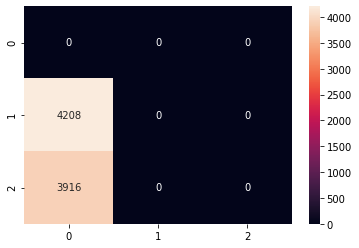

In [0]:
ap_model = AffinityPropagation()
ap_model.fit(x)
print("Accuracy {}".format(sum(ap_model.labels_ == y)/len(y)))
heatmap(confusion_matrix(y, ap_model.labels_), annot=True, fmt="d")
print(ap_model.labels_)
print(set(ap_model.labels_))
pass

AgglomerativeClustering 

Accuracy 0.10979812900049236
inverting labels...
Accuracy 0.8902018709995076
[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

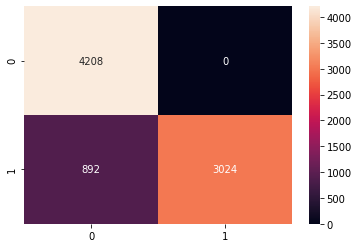

In [0]:
ac_model = AgglomerativeClustering(n_clusters=2)
pred_label = ac_model.fit_predict(x)
print("Accuracy {}".format(sum(pred_label== y)/len(y)))
print("inverting labels...")
inv = [not i for i in pred_label] 
print("Accuracy {}".format(sum(inv== y)/len(y)))
heatmap(confusion_matrix(y, inv), annot=True, fmt="d")
print(inv)
print(set(inv))
pass

MiniBatchKMeans

Accuracy 0.895371738060069
[0 0 0 ... 0 1 0]
{0, 1}


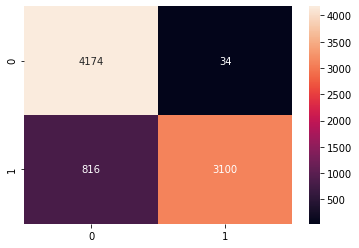

In [0]:
sp_model = MiniBatchKMeans(n_clusters=2, random_state=12)
sp_model.fit(x)
print("Accuracy {}".format(sum(sp_model.labels_== y)/len(y)))
heatmap(confusion_matrix(y, sp_model.labels_), annot=True, fmt="d")
print(sp_model.labels_)
print(set(sp_model.labels_))
pass

Вывод: лучшие результаты показывают кластеризаторы, которым можно явно указать количесвто кластеров и они показывают похожий результат(около 0.89 точности).